<a href="https://colab.research.google.com/github/NeuroLife77/BIOL309_final_project/blob/main/phase_plane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook is to explore the dynamics of the original Wilson-Cowan model

It contains an interactive phase plane with sliders to control the parameters of the model that we are interested in. 

I made this so you can better visualize what the model does and how it behaves with different parameter values.

## Run this cell once, then restart the Runtime, and run it again.
To restart the runtime click on the "Runtime" tab above and select "restart Runtime" or use the shortcut "ctrl+M ."

In [1]:
import matplotlib.pyplot as plt
try:
  %matplotlib ipympl
except:
  !python -m pip install ipympl
  %matplotlib ipympl
import numpy as np
try:
  from mpl_interactions import ipyplot as iplt
except:
  !python -m pip install mpl_interactions
  from mpl_interactions import ipyplot as iplt
from google.colab import output
output.enable_custom_widget_manager()

## Run this cell but you can ignore what's in it

In [2]:
#@numba.njit
def sig(x,c,a,alpha,b, **kwargs):
    return (c)/(1+np.exp(-a*(alpha*x-b)))
#@numba.njit
def xdot(x, y, cee = 16, cei = 15 , taue = 25, ke = 1, re = 1, ale = 1, be = 4, ae = 1.3, p = 1.25, ce = 1, thetae = 0, **kwargs):
    return 1/taue * (-x+(ke-re*x)*(sig(cee*x-cei*y + p - thetae, ce, ae, ale, be)))
#@numba.njit
def ydot(x,y, cii = 3, cie = 12, taui = 8, ki = 1, ri = 1, ali = 1, bi = 3.7, ai = 2.0, q = 0, ci = 1, thetai = 0, **kwargs):
    return 1/taui * (-y+(ki-ri*y)*(sig(cie*x-cii*y + q - thetai, ci, ai, ali, bi)))
#@numba.njit
def fn(x,y,fnxdot,fnydot, **kwargs):
    return fnxdot(x,y, **kwargs),fnydot(x,y, **kwargs),
#@numba.njit
def nullI(I, cii = 3, cie = 12, taui = 8, ki = 1, ri = 1, ali = 1, bi = 3.7, ai = 2.0, q = 0, ci = 1, thetai = 0, **kwargs):
    rE = (ai*(bi + ali*(thetai-q + cii*I)) - np.log((ci*ki/I)-ci*ri-1))/(ai*cie*ali)
    return rE
def brute_nullI(E, cii = 3, cei = 15, taui = 8, ki = 1, ri = 1, ali = 1, bi = 3.7, ai = 2.0, q = 0, ci = 1, thetai = 0, res = 1000, **kwargs):
    xgrid, ygrid = np.meshgrid(E,np.linspace(0,0.49,res))
    ydot_vals = ydot(xgrid,ygrid, cii = cii, cei = cei, taui = taui, ki = ki, ri = ri, ali = ali, bi = bi, ai = ai, q = q, ci = ci, thetai = thetai, **kwargs)
    abs_ydot_vals = np.abs(ydot_vals).T.argmin(1)
    I_vals = np.zeros_like(E)
    for j in range(E.shape[0]):
      I_vals[j] = ygrid[abs_ydot_vals[j]][j]
    global flow
    xmin,xmax,xresolution = 0,0.6, 30
    ymin,ymax,yresolution = 0,0.6, 30
    x_ax = np.linspace(xmin,xmax,xresolution)
    y_ax = np.linspace(ymin,ymax,yresolution)
    xgrid, ygrid = np.meshgrid(x_ax,y_ax)
    du, dv = fn(xgrid,ygrid,xdot,ydot,cii = cii, cei = cei, taui = taui, ki = ki, ri = ri, ali = ali, bi = bi, ai = ai, q = q, ci = ci, thetai = thetai, **kwargs) 
    flow.remove()
    flow = plt.quiver(xgrid,ygrid,du,dv, width = 0.001, angles="xy")
    return I_vals
    
def nullE(E, cee = 16, cei = 15, taue = 25, ke = 1, re = 1, ale = 1, be = 4, ae = 1.3, p = 1.25, ce = 1, thetae = 0, **kwargs):
    global flow
    xmin,xmax,xresolution = 0,0.6, 30
    ymin,ymax,yresolution = 0,0.6, 30
    x_ax = np.linspace(xmin,xmax,xresolution)
    y_ax = np.linspace(ymin,ymax,yresolution)
    xgrid, ygrid = np.meshgrid(x_ax,y_ax)
    du, dv = fn(xgrid,ygrid,xdot,ydot,cee = cee, cei = cei, taue = taue, ke = ke, re = re, ale = ale, be = be, ae = ae, p = p, ce = ce, thetae = thetae, **kwargs) 
    flow.remove()
    flow = plt.quiver(xgrid,ygrid,du,dv, width = 0.001, angles="xy")
    rI = (-ae*be + ae*ale*(p - thetae + cee*E) + np.log((ce*ke/E)-ce*re-1))/(ae*cei*ale)
    return rI

## Run the cell below and play with the sliders to view the phase plane at different parameters
Our default parameters are:

- cee = 16
- cie = 12
- taue = 8
- cii = 3
- cei = 15
- taui = 25

So you can fix those values and use the slider for your parameter of interest to see what it does to the phase plane.

The phase plane tells you how the system will evolve at each point in the ($E$,$I$) plane. The arrows are the "flow" along which the system will evolve over time, so if you pick a point anywhere in the plane and follow the arrows you have a simulation of the system.

The lines (Null E and Null I) refer to the points in the space where $\frac{dE}{dt}$ and $\frac{dI}{dt}$ are equal to 0. So if they cross at a specific point this point is a fixed point because $\frac{dE}{dt}= \frac{dI}{dt} = 0$, which means $E$ and $I$ won't change at this point.

Normally if you put your cursor close to that point on the plane it should tell you the x-y coordinates at the bottom of the plot.

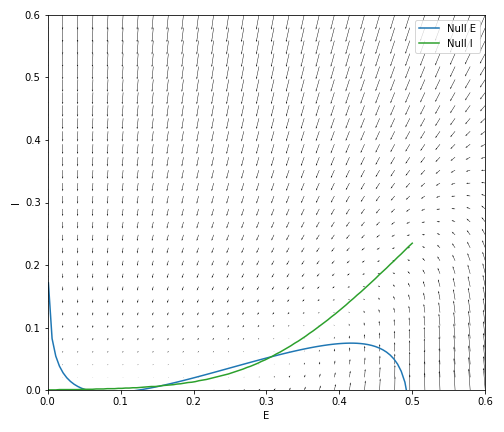

In [8]:
Exc_null_rE = np.linspace(0.001, 0.4999, 100)
Inh_null_rI = np.linspace(0.001, 0.4999, 100)
fig = plt.figure(figsize=(7,6))
ax = plt.subplot(1,1,1)
fig.patch.set_facecolor('xkcd:white')
xmin,xmax,xresolution = 0,0.6, 30
ymin,ymax,yresolution = 0,0.6, 30
x_ax = np.linspace(xmin,xmax,xresolution)
y_ax = np.linspace(ymin,ymax,yresolution)
xgrid, ygrid = np.meshgrid(x_ax,y_ax)
du, dv = fn(xgrid,ygrid,xdot,ydot, cee = 10, cie = 2) 
flow = plt.quiver(xgrid,ygrid,du,dv, width = 0.001,angles="xy")
plt.ylabel("I")
plt.xlabel("E")
plt.xlim([0,0.6])
plt.ylim([0,0.6])
ctrl = iplt.plot(Exc_null_rE, nullE, "C0", cee=(11,16,200), cie=(8,12,200), label = "Null E",ylim=[0, 0.6])
ctrlI = iplt.plot(Inh_null_rI, brute_nullI, "C2", controls = ctrl, label = "Null I",ylim=[0, 0.6] )
_ = plt.legend()
plt.ylabel("I")
plt.xlabel("E")
plt.tight_layout()
plt.show()